# **Importing Libraries**

In [39]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# **Gathering and assessing the data**

In [41]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **EDA**

In [42]:
data.shape

(284807, 31)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [44]:
data.Class.unique()

array([0, 1])

In [45]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [46]:
a = data[data.Class==0]
b = data[data.Class==1]

In [47]:
a = data.sample(738)

In [48]:
data_1 = b.append(a,ignore_index=True)

In [49]:
data_1.shape

(1230, 31)

In [50]:
X = data.drop(['Class'],axis=1)
y=data['Class']

# **Split Train and Test **

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [52]:
X_train.shape,X_test.shape

((227845, 30), (56962, 30))

# **Applying StandardScaler to obtain all the features**

In [53]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [54]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

# **Reshaping**

In [55]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# **Build CNN Model**

In [56]:
model=Sequential()
model.add(Conv1D(64,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(128,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 64)            192       
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 64)            256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 128)           16512     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 128)           512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3584)             

# **Compiling and Fiting**

In [58]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
history = model.fit(X_train,y_train,
                    steps_per_epoch = 25
                    ,epochs=20
                    ,validation_steps=2
                    ,verbose=1
                    ,validation_data=(X_test,y_test))

Epoch 1/20
25/25 [==============================] - 59s 2s/step - loss: 0.1068 - accuracy: 0.9699 - val_loss: 0.4273 - val_accuracy: 0.9992
Epoch 2/20
25/25 [==============================] - 58s 2s/step - loss: 0.0173 - accuracy: 0.9981 - val_loss: 0.2121 - val_accuracy: 0.9993
Epoch 3/20
25/25 [==============================] - 58s 2s/step - loss: 0.0129 - accuracy: 0.9986 - val_loss: 0.0886 - val_accuracy: 0.9993
Epoch 4/20
25/25 [==============================] - 58s 2s/step - loss: 0.0107 - accuracy: 0.9988 - val_loss: 0.0345 - val_accuracy: 0.9992
Epoch 5/20
25/25 [==============================] - 59s 2s/step - loss: 0.0089 - accuracy: 0.9989 - val_loss: 0.0158 - val_accuracy: 0.9992
Epoch 6/20
25/25 [==============================] - 58s 2s/step - loss: 0.0086 - accuracy: 0.9990 - val_loss: 0.0079 - val_accuracy: 0.9991
Epoch 7/20
25/25 [==============================] - 59s 2s/step - loss: 0.0082 - accuracy: 0.9991 - val_loss: 0.0054 - val_accuracy: 0.9991
Epoch 8/20
25/25 [==

Text(0.5, 1.0, 'Training VS Validation Accuracy')

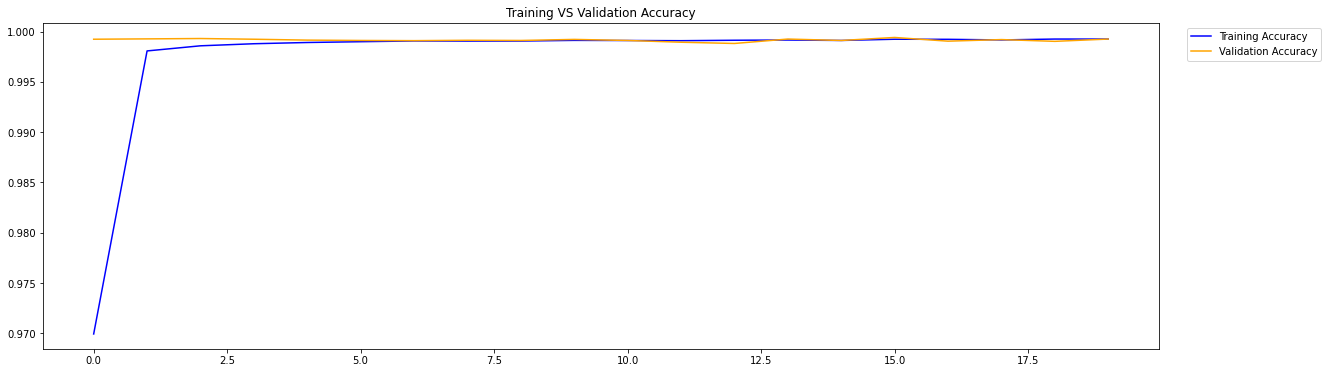

In [62]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs=range(len(acc)) 
plt.figure(figsize=(20, 6))

plt.plot(epochs, acc,color='blue', label='Training Accuracy')
plt.plot(epochs, val_acc,color='orange', label='Validation Accuracy')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right')
plt.title('Training VS Validation Accuracy')

# **Anomaly Detection**

In [63]:
anomaly = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## We have 492 fraud cases in the dataset which are anomalies.

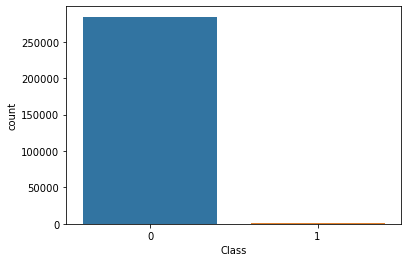

0    284315
1       492
Name: Class, dtype: int64


In [66]:
import seaborn as sns
sns.countplot(anomaly.Class)
plt.show()
print(anomaly.Class.value_counts())

# Lets transofrm this feature into hours to get a better understanding.

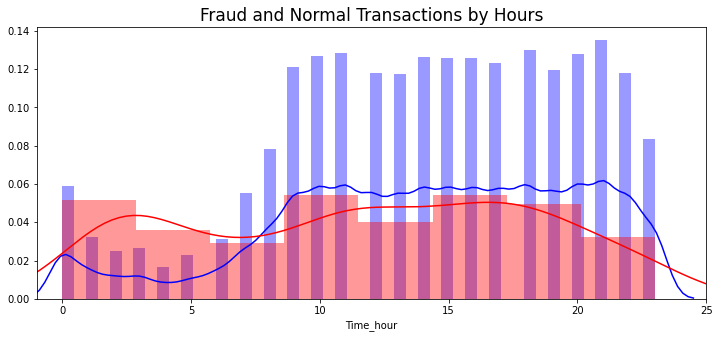

In [68]:
timedelta = pd.to_timedelta(anomaly['Time'], unit='s')
anomaly['Time_hour'] = (timedelta.dt.components.hours).astype(int)

plt.figure(figsize=(12,5))
sns.distplot(anomaly[anomaly['Class'] == 0]["Time_hour"], color='b')
sns.distplot(anomaly[anomaly['Class'] == 1]["Time_hour"], color='r')
plt.title('Fraud and Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()